<a href="https://colab.research.google.com/github/Joonqi/S4_WhaleIdentification/blob/main/S4_WhaleIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 관심데이터 선정 Plan A, Plan B
연구자에겐 가장 어려운 주제이다. "지금 무엇을 해야 할까?"
보통 초기 연구자는 연구실(회사)에서 하던 연구방향에서 +@를 구현하는 것이 대부분이다. (석사과정, 사원급)
우리는 아직 연구소가 없다.
이런 상황에서 연구주제를 정해야 하는데, 연구주제는 떠오르지 않고, 써보고 싶은 Method만 떠오르는 것이 아직 우리의 모습이다. 그렇기 때문에 연구주제를 정하기 위해서는 내가 취직하고 싶은 회사, 그 회사의 연구/사업 내용을 골라보고, 풀고자 하는 문제와 비슷한 데이터를 찾고, 그에 맞는 기술력을 키워보는 것을 목표로 한다.

2. 데이터 선정 이유 (단순히 관심있어서는 No. 내 취직방향에 대해서 고민해보기)
위의 예시와 같이 내가 선정한 데이터 그리고 그 데이터를 가공하면서 얻은 지식과 경험을 "어떤 회사에서 높이 살 수 있을까?", "어디 회사의 어느부분에 적용해 볼 수 있을까"를 생각해서 기록해본다.

3. 데이터를 이용한 가설
데이터를 선정함과 동시에 데이터를 통해서 내가 무엇을 해볼 수 있을 지 가설을 세우는 것이 중요하다.
쓸모있어야 한다. 데이터기반의 사고방식 (data-driven thinking/decision)에 대한 마음가짐을 Section1-2에서 배웠다. 이번에는 그것들을 심화시켜서 진짜 필요한 기술을 찾아볼 수 있는 생각을 해보자.
실제로는 쓸모 없을지 몰라도 적어도 내 생각에는 정말 쓸모있다고 생각하면 좋다.

4. 데이터 전처리
가설을 정했다면, 데이터의 가공을 시작해본다. 바로 적용이 될 수 있는 데이터도 있겠지만, 내가 전처리를 좀 해봐야 한다.

- 데이터의 정규화
- 노이즈 제거
- outlier 제거
- 타겟 레이블(label or Ground Truth) 생성 혹은 선택 등이 필요하다.

5. 딥러닝 방식 적용
내가 가진 문제를 굳이 딥러닝을 적용해야 하는 지 확인할 필요가 있다.
신경망 첫 시간에 엄청 큰 검을 들고 스테이크를 썰던 이미지를 기억하는가?
딥러닝의 가정 큰 장점은 어려운 문제를 더 어렵게 풀지만, 그 결과가 끝내주게 좋았을 때에 있다.
성능을 올리지 못하는 딥러닝 기술이 의미가 있을까?

6. Chance Level이 넘는 지 확인 (if not) Plan B 적용
binary 문제 (0 아니면 1인 문제)를 해결하면 chance level이 0.5(50%)이다. 하나로 찍는 머신이 있다고 가정해도 보통 50%정도는 달성하기 때문이다.
내가 만든 문제가 MNIST처럼 10개의 classification문제를 푼다고 하면 chance level이 0.1(10%)인 것이다.
가장 전통적인 ML 혹은 기본적인 신경망에 넣고 학습/테스트를 해 보았을 때 chance 수준으로 나오는 문제라면 딥러닝을 적용했을 때 과연 잘 나올 수 있을 지 반문하며, 데이터를 다시 들여다 보거나 내 가설이 틀렸을 수 있다는 것을 확인할 수 있어야 한다.

7. CV 적용하기
모델을 만들어서 어느정도 성능이 나왔다면, CV을 통해서 일반화될 가능성이 있는 지 확인해보자. 5-fold, 10-fold로 수행해보면, 일반화가 어느정도 되는지 알 수 있고, 더불어 파라미터를 변경하면서 최적화까지 해볼 수 있다.

8. Requirements.txt 만들고, 학습된 모델은 저장해보자.
내가 만든 딥러닝 모델을 단 한번만 사용하지 않을 것이기 때문에 모델을 저장하고, 또 새로운 환경에서 바로 구현할 수 있도록 Requirements.txt를 만들어보자.
언제까지 colab만 쓸 수 없기 때문이다.

9. 재구현하기
위에서 만든 Requirements.txt 를 이용하여 가상공간(conda, jupyter lab 등) 및 독립된 pc에서 같은 프로젝트를 진행해보자.
재구현이 되지 않으면, 아무도 이 결과에 대해서 믿어줄 수 없다. 따라서 재구현 할 수 있도록 Seed를 고정하는 작업을 했는 지 돌아보자.



In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
import tensorflow.keras.backend as K
K.clear_session()
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import Input, InputLayer, Dense, Activation, BatchNormalization, Flatten
from tensorflow.keras.layers import  Lambda, Conv2D, Dropout, MaxPooling2D, AveragePooling2D, Concatenate
from tensorflow.keras.models import Model, Sequential

import warnings
warnings.simplefilter('error', category=FutureWarning)

In [ ]:
os.getcwd()

'C:\\Users\\NAUGHT\\PY\\humpback-whale-identification'

In [ ]:
train_df = pd.read_csv('train.csv')

# Section 4 Project
# Humpback Whale Identification
## Kaggle competition

#### https://www.kaggle.com/c/humpback-whale-identification/overview

## 1) Data Description

### 혹등고래의 꼬리를 보고 어떤 개체인지 맞추는 모델
#### Train set에는 25361 장의 사진에 각각 어떤 개체인지 레이블이 달려있습니다.
#### Test set에는 7960 장의 사진이 있고, 이 사진이 각각 어떤 개체인지 추정하는 것이 목표입니다.
#### -> 따라서 각 고래 한마리 한마리를 클래스로 생각하고 이미지 분류 문제로 해결

In [ ]:
train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head(10)
# new whale 의 수가 많다

(25361, 2)


Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
5  0006e997e.jpg  new_whale
6  000a6daec.jpg  w_dd88965
7  000f0f2bf.jpg  new_whale
8  0016b897a.jpg  w_64404ac
9  001c1ac5f.jpg  w_a6f9d33

In [ ]:
# 클래스 갯수 확인
train_df.Id.nunique()

5005

In [ ]:
# 데이터의 분포 확인
# 25361 샘플 / 5005 클래스 => 클래스 당 5장
train_df[['Id','Image']].groupby('Id').count().sort_values(by='Image', ascending=False).head(13).T

Id     new_whale  w_23a388d  w_9b5109b  w_9c506f6  w_0369a5c  w_700ebb4  \
Image       9664         73         65         62         61         57   

Id     w_3de579a  w_564a34b  w_fd3e556  w_88e4537  w_2b069ba  w_d405854  \
Image         54         51         50         49         48         47   

Id     w_789c969  
Image         45

In [ ]:
# 실제 사진 확인
def plot_images(prefix, filenames, table_size, labels=''):
    imgs_filename = [prefix + str(file) for file in filenames]
    imgs = [plt.imread(file) for file in imgs_filename]
    figure = plt.figure(figsize=(30, 30))
    r, c = table_size
    for i in range(len(imgs)):
        subplot = figure.add_subplot(r, c, i+1)
        subplot.axis('Off')
        if not np.all(labels == ''):
            labels = labels.reset_index(drop=True)
            subplot.set_title(labels[i], fontsize=30)
        subplot.imshow(imgs[i], cmap='gray')
    plt.tight_layout()
    plt.show()

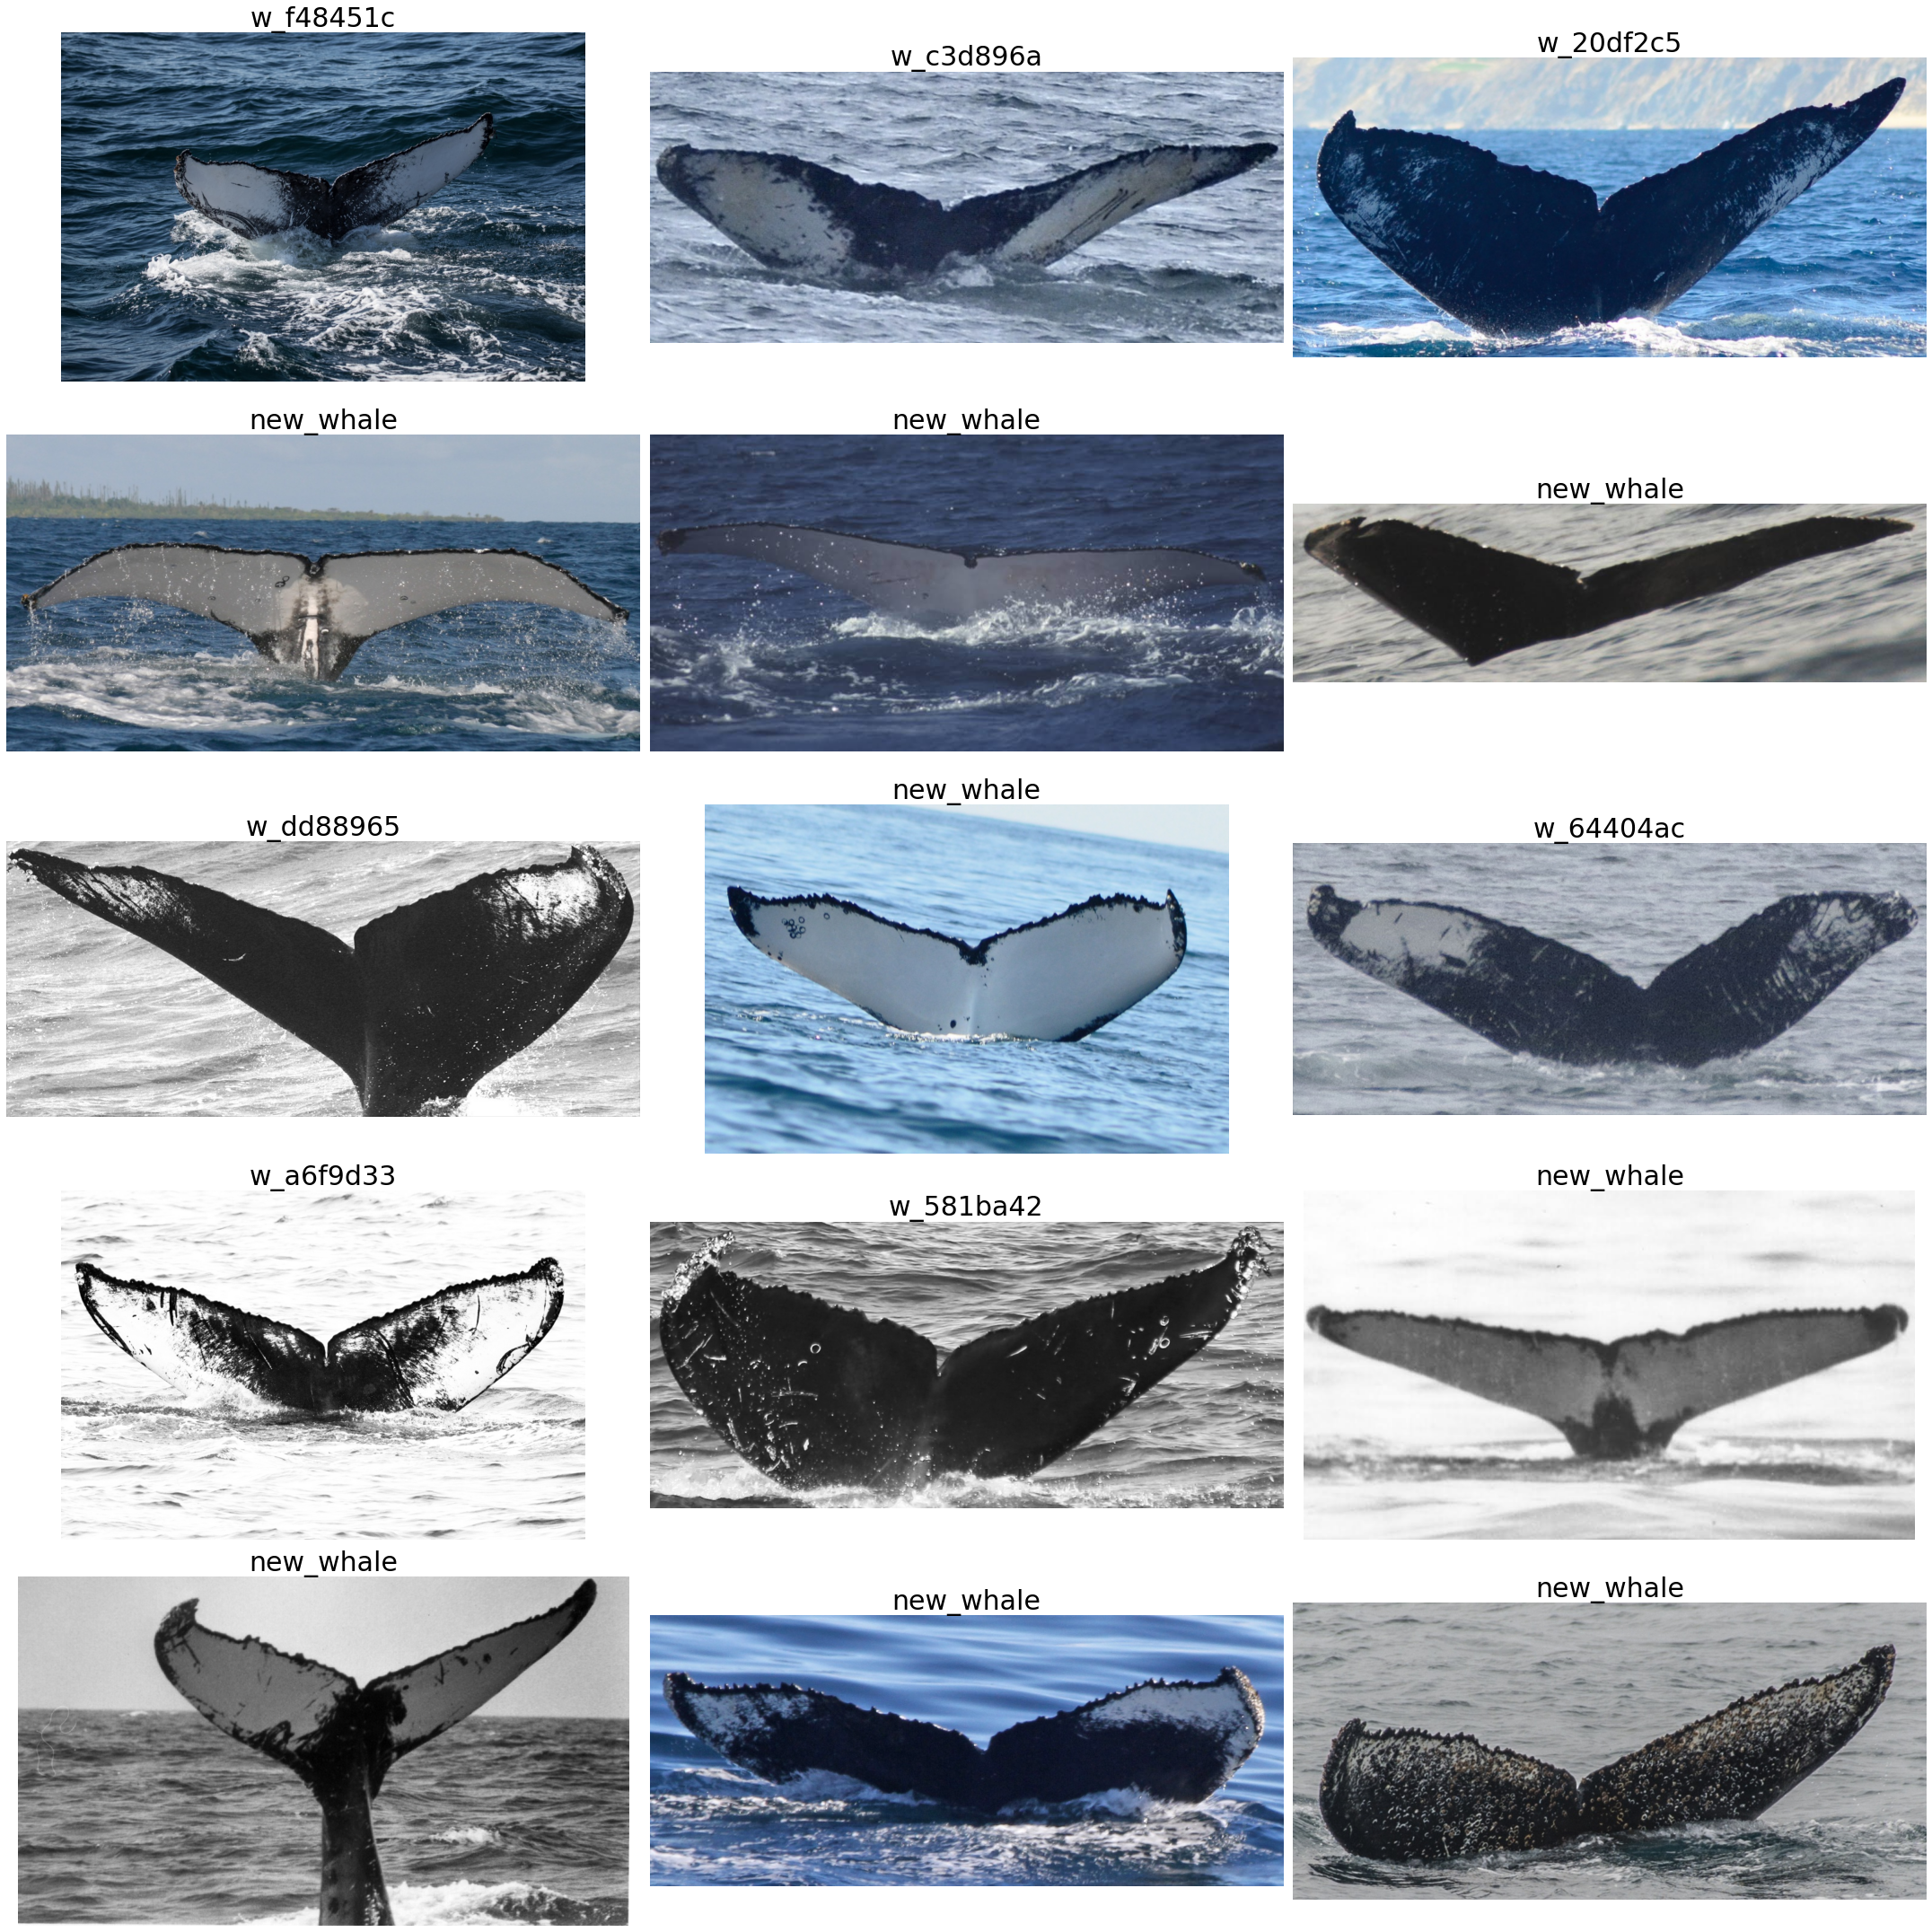

In [ ]:
prefix = 'dataset/trainset/train/'
plot_images(prefix, train_df.Image.iloc[:15], (5, 3), train_df.Id)

## 2) Preprocessing Data

In [ ]:
# 데이터 중 이름이 없는 new_whale 제거
label = list(train_df.Id)
train_df = train_df[train_df.Id != 'new_whale']

# 불균형 문제를 해결하기 위해 
# 사진 중 각 개체당 한 장씩 해상도가 가장 높은 사진만 남기기
# 이후 데이터 증강을 통해서 적어진 샘플 수를 보완
width = []
height = []
for name in train_df.Image:
    img = load_img('dataset/trainset/train/' + str(name))
    width.append(img.size[0])
    height.append(img.size[1])
train_df['width'] = width
train_df['height'] = height

train_df = train_df.reset_index(drop=True)
high_resol = train_df.groupby(['Id']).max().Image
largest = train_df.loc[train_df['Image'].isin(high_resol)][['Id', 'Image']]
smalls = train_df.loc[~train_df['Image'].isin(high_resol)][['Id', 'Image']]
largest.head(10)

Id          Image
40   w_62bb54b  00a4de95e.jpg
56   w_bf33ddf  00e68dc59.jpg
66   w_8be8406  011258703.jpg
68   w_dd00c66  0118a64b8.jpg
86   w_deacb11  0165c60f3.jpg
90   w_f1cd92c  016aa69cf.jpg
101  w_a491df7  0187bfdff.jpg
120  w_d4211d9  01f58bda4.jpg
124  w_5833b3d  0206722e5.jpg
127  w_b5c90a5  0215715b6.jpg

In [ ]:
# 사진을 numpy array 형태로 import
SIZE = 160
def prepareImage(data, m, dataset):
    X_train = np.zeros((m, SIZE, SIZE, 3))
    count = 0
    
    for fig in data['Image']:
        img = load_img(f'{dataset}/{fig}', target_size=(SIZE, SIZE))
        img = img.convert('RGB')
        x = img_to_array(img)
        x = x.astype('float32')
        X_train[count] = x/255.
        
        if (count%3000==0):
            print(f'Processing Image:{count}')
        count +=1
        
    return X_train

In [ ]:
# 레이블 인코더
def prepare_labels(y):
    values=np.array(y)
    label_encoder=LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encode = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encode)
    
    y_o = onehot_encoded
    y = integer_encoded
    return y, y_o, label_encoder, onehot_encoder

In [ ]:
X = prepareImage(train_df, train_df.shape[0], 'dataset/trainset/train')
y, y_o, lbenc, ohenc = prepare_labels(train_df.Id)
y = np.ravel(y)

Processing Image:0
Processing Image:3000
Processing Image:6000
Processing Image:9000
Processing Image:12000
Processing Image:15000


In [ ]:
X_lar = X[largest.index, :, :, :]
X_sml = X[smalls.index, :, :, :]
y_lar = y[largest.index]
y_sml = y[smalls.index]
y_larc = y_o[largest.index]
y_smc = y_o[smalls.index]
print(X_lar.shape, y_lar.shape, y_larc.shape)
print(X_sml.shape, y_sml.shape, y_smc.shape)

(5004, 160, 160, 3) (5004,) (5004, 5004)
(10693, 160, 160, 3) (10693,) (10693, 5004)


## 3) Building Deep Learning Model
- Image Data Augmentation
- Build CNN model : Image classification
- Transfer learning : FaceNet model

### CNN 구조를 기반으로 모델을 구성합니다.
### Image classification 문제로 생각하고 모델 구성
예측하는 클래스는 총 5004개<br>
확률적인 정확도의 기댓값은 0.0002

In [ ]:
min_acc = 1 / 5004
min_acc

0.00019984012789768185

In [ ]:
# Image Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,
                             shear_range=.5,
                             rotation_range=90,
                             width_shift_range=.2,
                             height_shift_range=.2)

datagen.fit(X_lar, augment=True)

In [ ]:
# 변형 결과 확인
k = 0
for i, j in datagen.flow(X_lar, y_lar):
    if k == 0: 
        i0 = i 
        j0 = j
    if k == 1: 
        i1 = i 
        j0 = j
    if k == 2: break
    k+=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


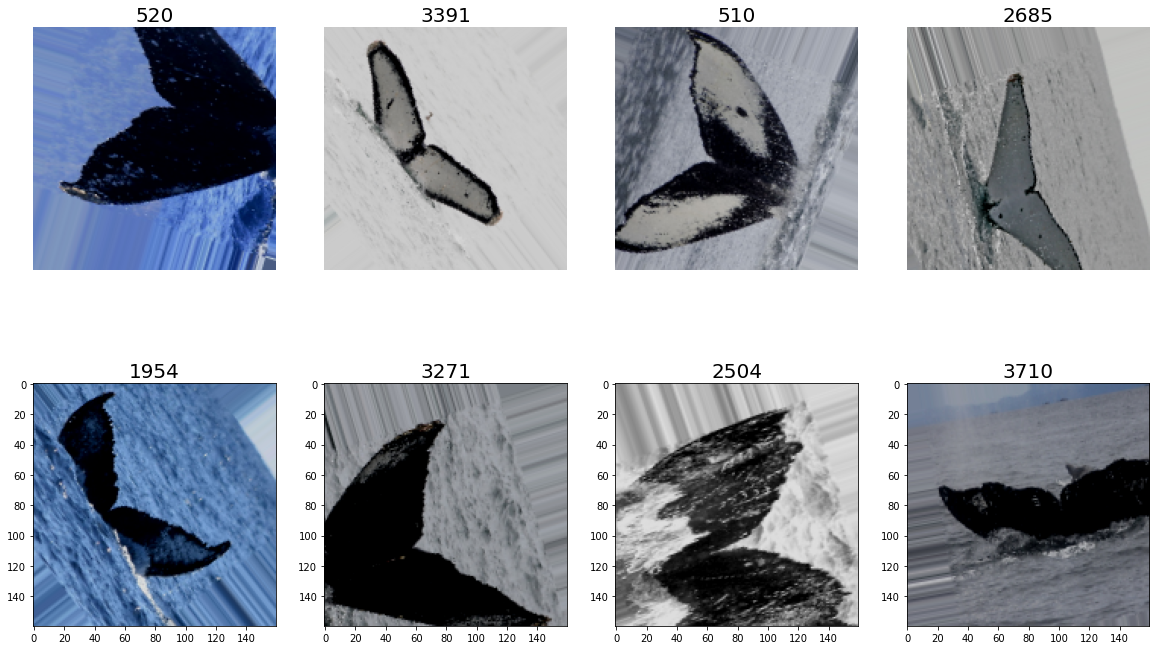

In [ ]:
figure = plt.figure(figsize=(20, 12))
for h in range(4):    
    subplot = figure.add_subplot(2, 4, h+1)
    subplot.axis('Off')
    subplot.set_title(j0[h], fontsize=20)
    subplot.imshow(i0[h], cmap='gray')
for h in range(4, 8):
    subplot = figure.add_subplot(2, 4, h+1)
    subplot.set_title(j0[h], fontsize=20)
    subplot.imshow(i1[h-4], cmap='gray')

In [ ]:
# Vanilla CNN model
def build_net(l2 = 0.001):
    regul = tf.keras.regularizers.l2(l2)
    
    inp = Input(shape = (SIZE, SIZE, 3))
    x = Conv2D(32, (3, 3), strides=2, activation='relu')(inp) # Conv 1
    x = Conv2D(64, (3, 3), strides=2, activation='relu',
               kernel_regularizer=regul)(x)                   # Conv 2
    x = Conv2D(64, (3, 3), strides=2, activation='relu',
           kernel_regularizer=regul)(x)                       # Conv 3
    x = Conv2D(64, (1, 1), strides=1, padding='same', activation='relu',
               kernel_regularizer=regul)(x)                   # Conv 4
    
    x1 = Conv2D(64, (1, 1), strides=1, padding='same', activation='relu')(x)
                                                              # Conv 5
    x = Concatenate()([x, x1])
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    
    x = Dense(1024, activation='relu')(x)                      # fc 1
    x = Dense(5004)(x)                                         # ouptput layer
    x = BatchNormalization()(x)
    output = Activation('softmax')(x)
    
    model = Model(inp, output)
    
    return model

model = build_net()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 79, 79, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 39, 39, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 19, 19, 64)   36928       conv2d_1[0][0]                   
______________________

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [ ]:
train_generator = datagen.flow(X_lar, y_larc, batch_size=16)

In [ ]:
model.fit(train_generator, epochs=20, verbose=2)
model.save('cnn_weights.h5')

Epoch 1/20
313/313 - 34s - loss: 8.6771 - acc: 0.0000e+00
Epoch 2/20
313/313 - 29s - loss: 8.5716 - acc: 1.9984e-04
Epoch 3/20
313/313 - 30s - loss: 8.3289 - acc: 7.9936e-04
Epoch 4/20
313/313 - 29s - loss: 7.8448 - acc: 0.0020
Epoch 5/20
313/313 - 28s - loss: 7.6203 - acc: 0.0038
Epoch 6/20
313/313 - 30s - loss: 7.5014 - acc: 0.0052
Epoch 7/20
313/313 - 31s - loss: 7.4098 - acc: 0.0094
Epoch 8/20
313/313 - 29s - loss: 7.3292 - acc: 0.0086
Epoch 9/20
313/313 - 29s - loss: 7.2477 - acc: 0.0096
Epoch 10/20
313/313 - 27s - loss: 7.1704 - acc: 0.0144
Epoch 11/20
313/313 - 28s - loss: 7.0946 - acc: 0.0168
Epoch 12/20
313/313 - 31s - loss: 7.0108 - acc: 0.0194
Epoch 13/20
313/313 - 28s - loss: 6.9439 - acc: 0.0248
Epoch 14/20
313/313 - 27s - loss: 6.8733 - acc: 0.0236
Epoch 15/20
313/313 - 26s - loss: 6.8178 - acc: 0.0312
Epoch 16/20
313/313 - 33s - loss: 6.7517 - acc: 0.0326
Epoch 17/20
313/313 - 26s - loss: 6.6905 - acc: 0.0388
Epoch 18/20
313/313 - 27s - loss: 6.6356 - acc: 0.0390
Epoch 1

In [ ]:
cnn_result = model.evaluate(X, y_o)
print('CNN model loss     :', cnn_result[0])
print('CNN model accuracy :', cnn_result[1])
print('Minimun accuracy   :', min_acc)

C:\Users\NAUGHT\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


CNN model loss     : 8.702191906202566
CNN model accuracy : 0.0031216156
Minimun accuracy   : 0.00019984012789768185


In [ ]:
# kaggle 제출 폼에 맞게 submission 파일을 작성
test = os.listdir('dataset/testset/test')
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = 'new_whale'

In [ ]:
# Test dataset 불러오기
X_test = prepareImage(test_df, test_df.shape[0], 'dataset/testset/test')

Processing Image:0
Processing Image:3000
Processing Image:6000


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
for i, pred in enumerate(y_pred):
    test_df.loc[i, 'Id'] = 'new_whale ' + ' '.join(lbenc.inverse_transform(pred.argsort()[-4:][::-1]))
test_df.head(10)

Image                                                 Id
0  00028a005.jpg  new_whale w_95f78f6 w_f056e82 w_b72dc3d w_702f2a0
1  000dcf7d8.jpg  new_whale w_ea902fb w_68d1fb0 w_3a34d6f w_f1b016e
2  000e7c7df.jpg  new_whale w_7dd1222 w_ff7a4ae w_d22e12a w_b77efda
3  0019c34f4.jpg  new_whale w_e93b569 w_76f95b1 w_2d6bb89 w_fb4f74a
4  001a4d292.jpg  new_whale w_781654e w_072179d w_8f38839 w_0823d50
5  00247bc36.jpg  new_whale w_e13f4e8 w_b035775 w_73b6699 w_d3e3b56
6  0027089a4.jpg  new_whale w_bc022c6 w_03a82c1 w_18666da w_4523384
7  002de4d94.jpg  new_whale w_9d59be4 w_bb56867 w_ae7887b w_8f38839
8  002f52f0c.jpg  new_whale w_2dd6b62 w_57a546c w_69b046b w_36f91ad
9  002fd89d4.jpg  new_whale w_ff7a4ae w_84dadae w_cafaa6f w_d4999d4

In [ ]:
test_df.to_csv('cnn_submission.csv', index=False)
K.clear_session()

In [ ]:
# !kaggle competitions submit -c humpback-whale-identification -f submission.csv -m "Message"

### Transfer learning
#### '꼬리의 무늬를 보고 어떤 개체인지 맞춘다' 가 '사람 얼굴을 보고 누구인지 맞춘다'와 유사한 알고리즘일 수 있다.
#### 안면인식 기술은 Apple이나 Windows 등 널리 활용되고 있고,<br>여러 금융회사들에서도 도입을 시도 중이다.
#### 얼굴 인식에서 이미 좋은 성능을 거두고 있는 모델을 적용
### Google Facenet 시도

In [ ]:
from deepface import DeepFace
from deepface.basemodels import Facenet, ArcFace

In [ ]:
# Face Net model
fnet_model = Facenet.loadModel()
for layer in fnet_model.layers:
    layer.trainable=False

In [ ]:
fnet_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [ ]:
# 문제에 맞게 출력층을 추가
prediction = Dense(5004, activation='softmax')(fnet_model.output)
fnet_model = Model(fnet_model.input, prediction)

In [ ]:
fnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['acc'])
# 과적합 우려가 있기 때문에 에폭을 적게 설정
fnet_model.fit(X_lar, y_lar, epochs=3, batch_size=16, verbose=2)

Train on 5004 samples
Epoch 1/3
5004/5004 - 40s - loss: 8.8122 - acc: 0.0000e+00
Epoch 2/3
5004/5004 - 27s - loss: 7.7646 - acc: 0.0236
Epoch 3/3
5004/5004 - 26s - loss: 6.7580 - acc: 0.2118


In [ ]:
fnet_result = fnet_model.evaluate(X, y)
print('FaceNet Model loss     :', fnet_result[0])
print('FaceNet model accuracy :', fnet_result[1])
print('Minumum accuracy       :', min_acc)

FaceNet Model loss     : 8.641711727224232
FaceNet model accuracy : 0.0003185322
Minumum accuracy       : 0.00019984012789768185


In [ ]:
# submission 파일 작성
test = os.listdir('dataset/testset/test/')
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = 'new_whale'

y_pred_fn = fnet_model.predict(X_test)
for i, pred in enumerate(y_pred_fn):
    test_df.loc[i, 'Id'] = 'new_whale ' + ' '.join(lbenc.inverse_transform(pred.argsort()[-4:][::-1]))
test_df.to_csv('facenet_submission.csv', index=False)
K.clear_session()